<a href="https://colab.research.google.com/github/rawanmd/cv_assignment_1/blob/main/CV_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

## **Co-occurrence matrix and calculate contrast**

In [ ]:
def CalculateCo_occurrence(image):
  output = np.zeros((256, 256))

  for i in range(image.size[0]):
    for j in range(image.size[1]-1):
      north_pixel = image.getpixel((i,j))
      south_pixel = image.getpixel((i,j+1))

      output[north_pixel,south_pixel] += 1

  return output

In [ ]:
def CalculateContrast(cr):
  contrast = 0
  a = 0
  b = 0

  for i in range(cr.shape[0]):
    for j in range(cr.shape[1]):
      a += cr[i,j]*abs(i-j)
      b += abs(i-j)

  contrast = a/b

  return contrast

## **Calculate Histograms**

In [ ]:
def CalculateHistogram(im):
  # image = np.array(im, dtype=np.uint8)
  hist = np.zeros(256)

  for i in range(im.size[0]):
    for j in range(im.size[1]):
      intensity = im.getpixel((i,j))
      hist[intensity] += 1

  return hist

In [ ]:
def CalculateCumulativeHistogram(hist):
  sum = 0
  cumulative_hist = np.zeros(256)

  for i in range(hist.size):
    sum += hist[i]
    cumulative_hist[i] = sum

  return cumulative_hist

In [ ]:
def GetColorAtPercentage(cumulative_histogram, percentage):
    if not (0 <= percentage <= 100):
        raise ValueError("Percentage must be between 0 and 100.")

    total_pixels = cumulative_histogram[-1]  # Total number of pixels in the image
    target_pixels = total_pixels * (percentage / 100)

    # Find the intensity for the lower end (5% in this example)
    lower_intensity = None
    for i, count in enumerate(cumulative_histogram):
        if count >= target_pixels:
            lower_intensity = i
            break

    # Find the intensity for the upper end (95% in this example)
    upper_intensity = None
    for i, count in enumerate(cumulative_histogram):
        if count >= total_pixels - target_pixels:
            upper_intensity = i
            break

    return lower_intensity, upper_intensity

## **Modify histogram**

In [ ]:
def StretchContrast(im, a, b, c, d):
  output = im.copy()

  for i in range(im.size[0]):
    for j in range(im.size[1]):
      value = (int) ((im.getpixel((i,j)) - c) * ((b-a)/(d-c)) + a)
      if value < 0:
        value = 0
      elif value > 255:
        value = 255
      output.putpixel((i,j), value)

  return output

In [ ]:
def EqualizeHistogram(im, min, max):
  hist = CalculateHistogram(im)
  c_hist = CalculateCumulativeHistogram(hist)
  total_pixels = c_hist[-1]
  output = im.copy()

  for i in range(im.size[0]):
    for j in range(im.size[1]):
      pixel_value = im.getpixel((i,j))

      new_intensity = int(((c_hist[pixel_value] - c_hist[min]) /
                                 (total_pixels - c_hist[min])) * (max - min))

      output.putpixel((i,j), new_intensity)

  return output

In [ ]:
def Gray_scaleTransformation(im, x1, y1, x2, y2):
  output = im.copy()

  for i in range(im.size[0]):
    for j in range(im.size[1]):
      p = im.getpixel((i,j)) #original intensity
      if p<x1:
        q = (int)(p*(y1/x1)) #new intensity
      elif p<x2:
        q = (int)(((p - x1)*((y2-y1)/(x2-x1)))+y1)
      else:
        q = (int)(((p - x2)*((255-y2)/(255-x2)))+y2)
      output.putpixel((i,j), q)

  return output

# **Testing**

### **Image from the Lecture**

In [ ]:
!wget -O image.png "https://images.squarespace-cdn.com/content/v1/5eb9df33b77a9729b4d3b5f9/2f4bbcfd-87c2-4253-a62e-971770630976/ghost+1.png"
im = Image.open("image.png").convert('L')

--2023-10-23 14:29:20--  https://images.squarespace-cdn.com/content/v1/5eb9df33b77a9729b4d3b5f9/2f4bbcfd-87c2-4253-a62e-971770630976/ghost+1.png
Resolving images.squarespace-cdn.com (images.squarespace-cdn.com)... 151.101.0.238, 151.101.64.238, 151.101.128.238, ...
Connecting to images.squarespace-cdn.com (images.squarespace-cdn.com)|151.101.0.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61598 (60K) [image/jpeg]
Saving to: ‘image.png’

image.png           100%[===================>]  60.15K  --.-KB/s    in 0.01s   

2023-10-23 14:29:20 (5.82 MB/s) - ‘image.png’ saved [61598/61598]



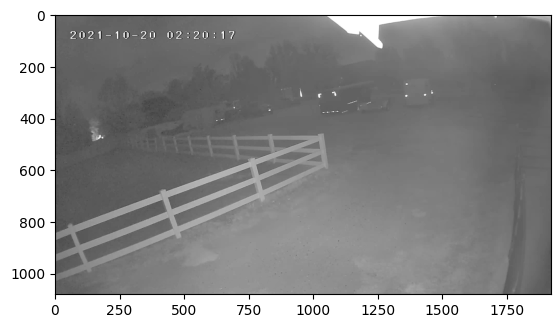

In [ ]:
plt.imshow(im, cmap="gray")

In [ ]:
hist = CalculateHistogram(im)

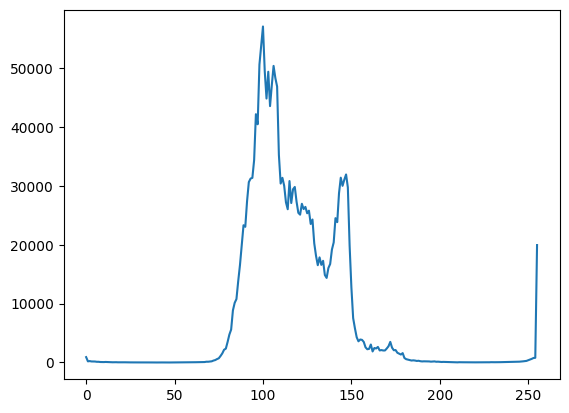

In [ ]:
plt.figure()
plt.plot(hist)
plt.show()

In [ ]:
c_hist = CalculateCumulativeHistogram(hist)

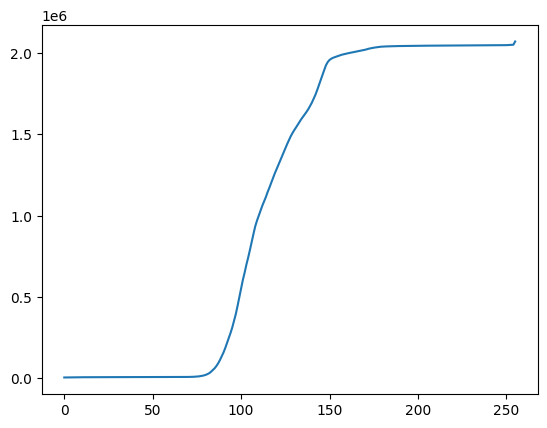

In [ ]:
plt.figure()
plt.plot(c_hist)
plt.show()

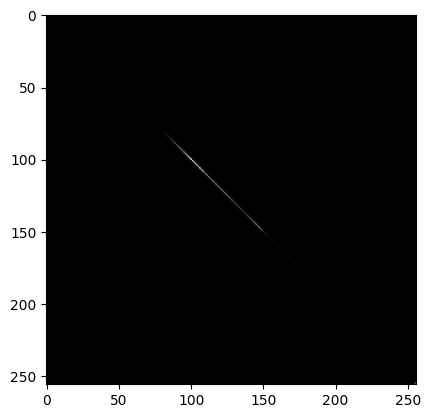

In [ ]:
cr = CalculateCo_occurrence(im)
plt.imshow(cr, cmap="gray")

Intial Contrast

In [ ]:
contrast_in = CalculateContrast(cr)
contrast_in

0.35504352397573813

In [ ]:
min1, max1 = GetColorAtPercentage(c_hist, 5)

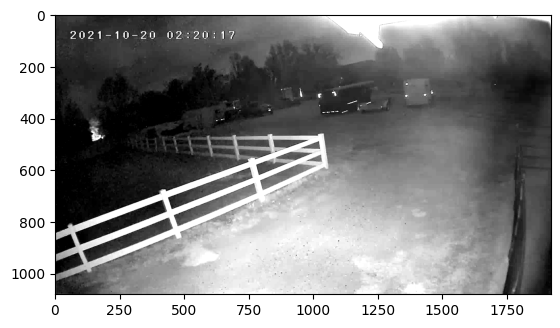

In [ ]:
im_lec1_s = StretchContrast(im, 0, 255, min1, max1)
plt.imshow(im_lec1_s, cmap="gray")

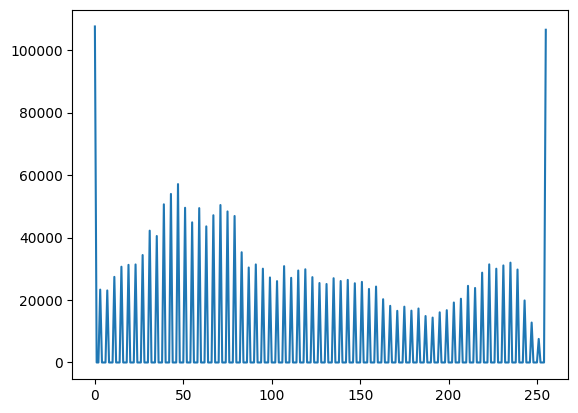

In [ ]:
hist = im_lec1_s.histogram()
plt.figure()
plt.plot(hist)
plt.show()

In [ ]:
min2, max2 = GetColorAtPercentage(c_hist, 10)

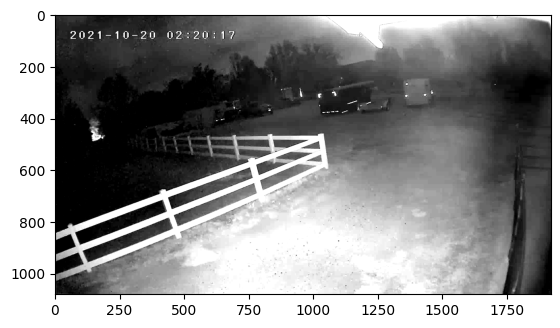

In [ ]:
im_lec2_s = StretchContrast(im, 0, 255, min2, max2)
plt.imshow(im_lec2_s, cmap="gray")

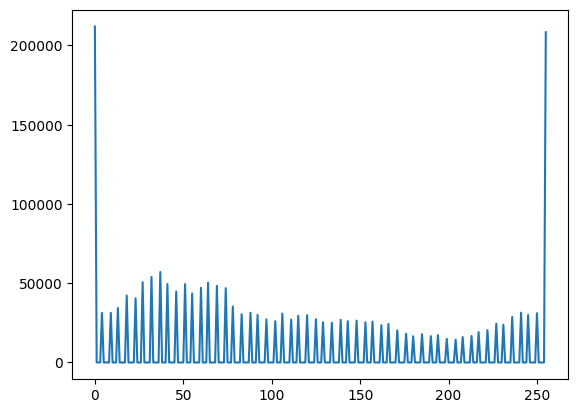

In [ ]:
hist = im_lec2_s.histogram()
plt.figure()
plt.plot(hist)
plt.show()

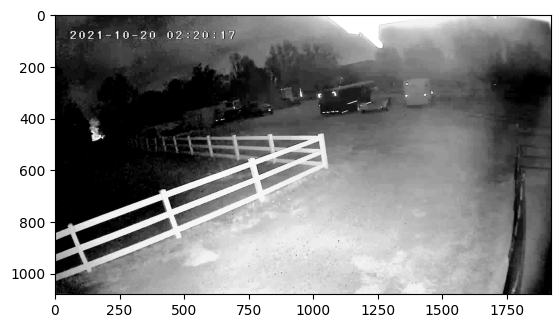

In [ ]:
equalize2 = EqualizeHistogram(im, min2, max2)
plt.imshow(equalize2, cmap="gray")

In [ ]:
min3, max3 = GetColorAtPercentage(c_hist, 15)

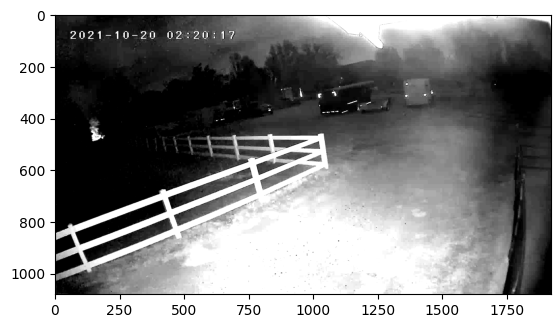

In [ ]:
im_lec3_s = StretchContrast(im, 0, 255, min3, max3)
plt.imshow(im_lec3_s, cmap="gray")

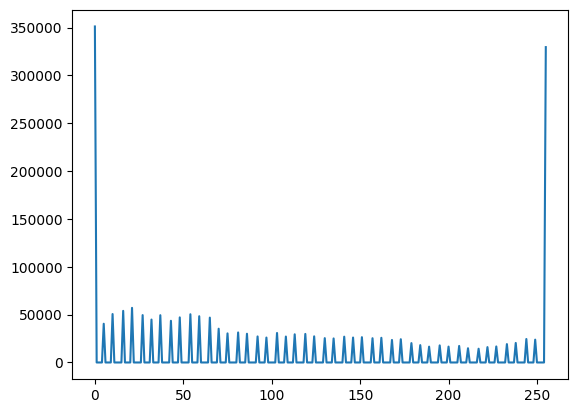

In [ ]:
hist = im_lec3_s.histogram()
plt.figure()
plt.plot(hist)
plt.show()

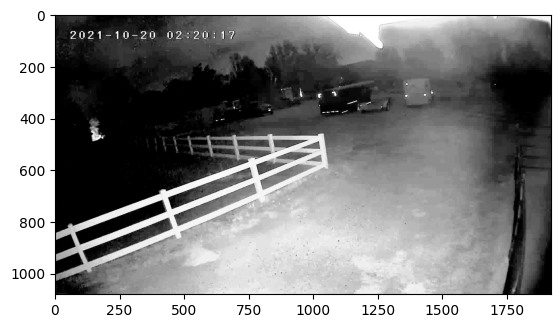

In [ ]:
equalize3 = EqualizeHistogram(im, min3, max3)
plt.imshow(equalize3, cmap="gray")

Increase Contrast

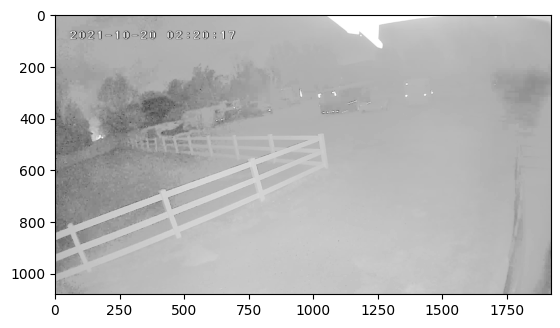

In [ ]:
im1_gray = Gray_scaleTransformation(im, 50, 10, 100, 175)
plt.imshow(im1_gray, cmap="gray")

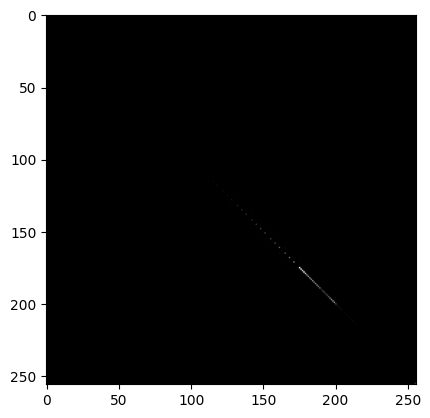

In [ ]:
cr_cont = CalculateCo_occurrence(im1_gray)
plt.imshow(cr_cont, cmap="gray")

In [ ]:
contrast_inc = CalculateContrast(cr_cont)
contrast_inc

0.4068059410048066

Brighten

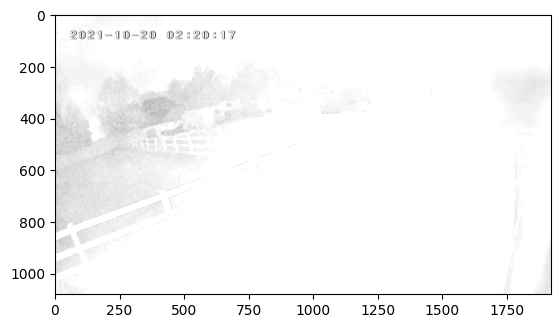

In [ ]:
im1_grayy = Gray_scaleTransformation(im, 0, 50, 100, 255)
plt.imshow(im1_grayy, cmap="gray")

### **First Image**

In [ ]:
!wget -O image.png "https://networkcameratech.com/wp-content/uploads/2016/10/HIKVISION-DS-2CD2142FWD-I_2016-Nov-09_21_59_05.png"
im = Image.open("image.png").convert('L')

--2023-10-23 14:45:50--  https://networkcameratech.com/wp-content/uploads/2016/10/HIKVISION-DS-2CD2142FWD-I_2016-Nov-09_21_59_05.png
Resolving networkcameratech.com (networkcameratech.com)... 54.157.250.197
Connecting to networkcameratech.com (networkcameratech.com)|54.157.250.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1561813 (1.5M) [image/png]
Saving to: ‘image.png’

image.png           100%[===================>]   1.49M  3.54MB/s    in 0.4s    

2023-10-23 14:45:51 (3.54 MB/s) - ‘image.png’ saved [1561813/1561813]



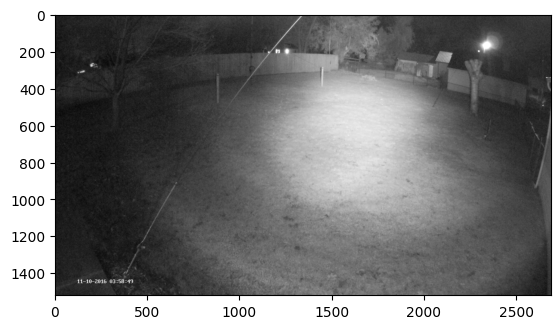

In [ ]:
plt.imshow(im, cmap="gray")

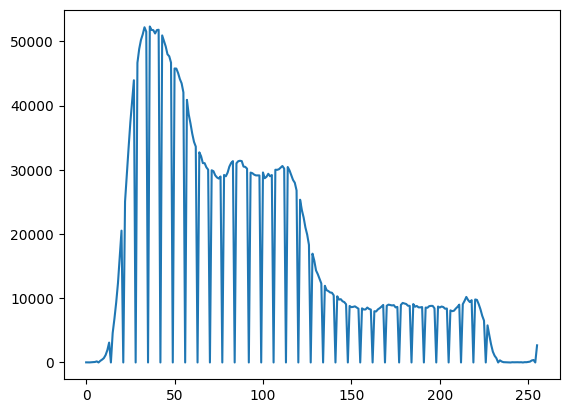

In [ ]:
hist = im.histogram()
plt.figure()
plt.plot(hist)
plt.show()

In [ ]:
hist = CalculateHistogram(im)

In [ ]:
c_hist = CalculateCumulativeHistogram(hist)

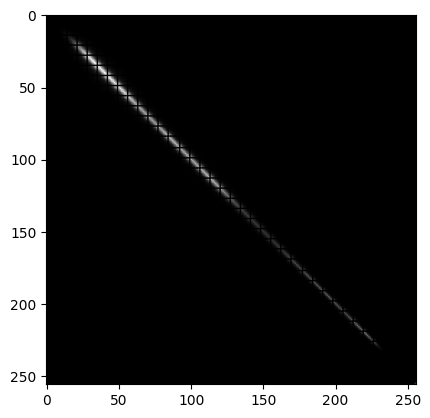

In [ ]:
cr = CalculateCo_occurrence(im)
plt.imshow(cr, cmap="gray")

Initial Contrast

In [ ]:
contrast_in = CalculateContrast(cr)
contrast_in

1.4639893639848935

In [ ]:
min1, max1 = GetColorAtPercentage(c_hist, 5)
min1, max1

(26, 202)

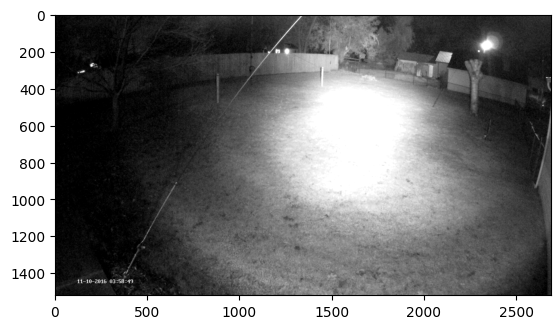

In [ ]:
im1_streched = StretchContrast(im,0, 255, min1, max1)
plt.imshow(im1_streched, cmap="gray")

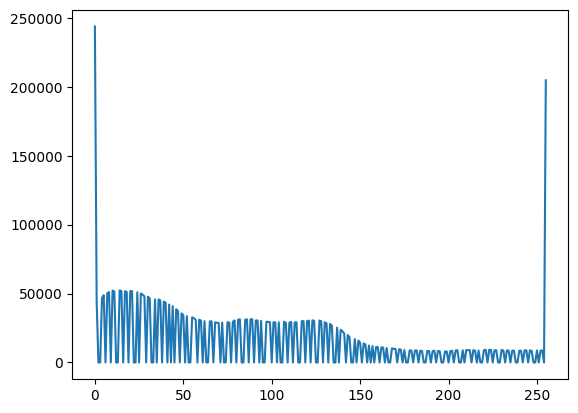

In [ ]:
hist = im1_streched.histogram()
plt.figure()
plt.plot(hist)
plt.show()

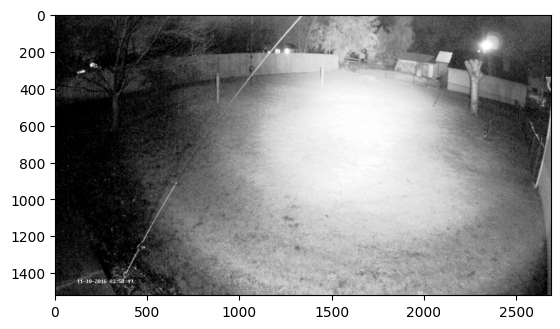

In [ ]:
equalize1 = EqualizeHistogram(im, min1, max1)
plt.imshow(equalize1, cmap="gray")

In [ ]:
min2, max2 = GetColorAtPercentage(c_hist, 10)
min2, max2

(31, 174)

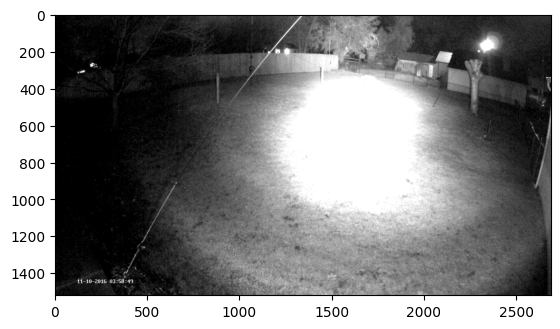

In [ ]:
im1_streched2 = StretchContrast(im,0, 255, min2, max2)
plt.imshow(im1_streched2, cmap="gray")

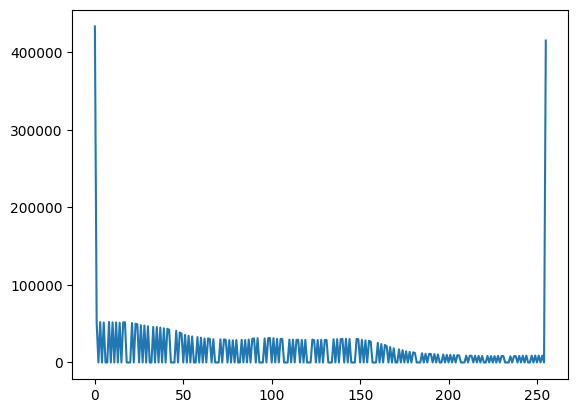

In [ ]:
hist = im1_streched2.histogram()
plt.figure()
plt.plot(hist)
plt.show()

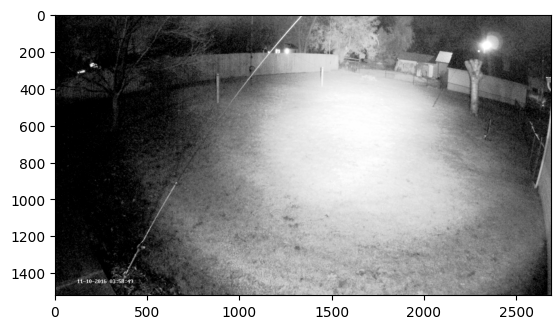

In [ ]:
equalize2 = EqualizeHistogram(im, min2, max2)
plt.imshow(equalize2, cmap="gray")

In [ ]:
min3, max3 = GetColorAtPercentage(c_hist, 15)
min3, max3

(36, 146)

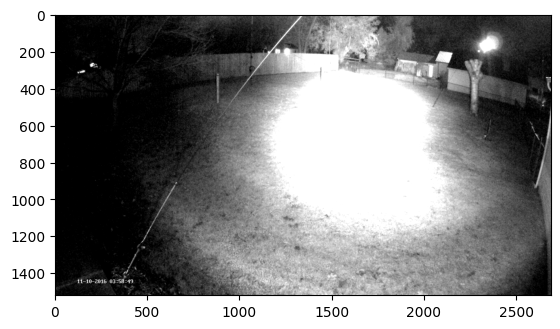

In [ ]:
im1_streched3 = StretchContrast(im,0, 255, min3, max3)
plt.imshow(im1_streched3, cmap="gray")

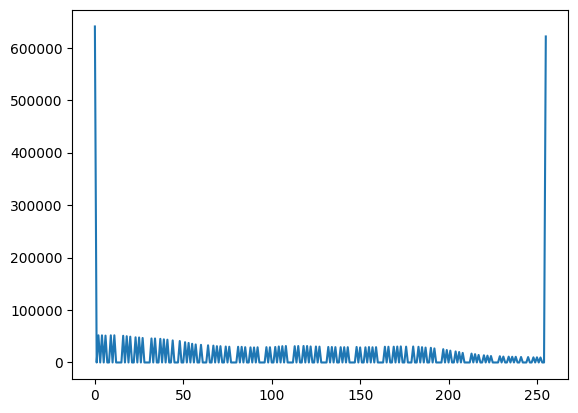

In [ ]:
hist = im1_streched3.histogram()
plt.figure()
plt.plot(hist)
plt.show()

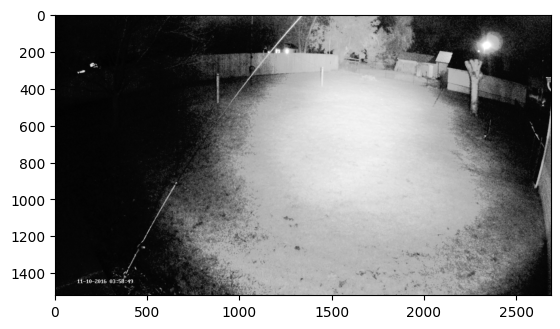

In [ ]:
im1_gray = Gray_scaleTransformation(im, 26, 10, 202, 175)
plt.imshow(im1_gray, cmap="gray")

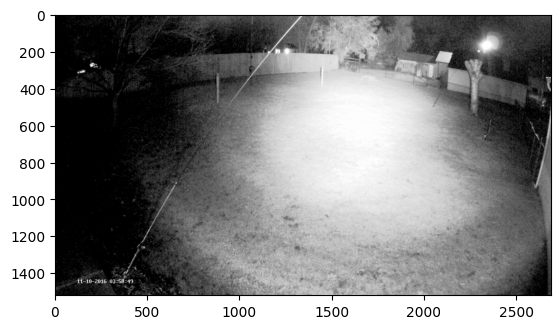

In [ ]:
equalize3 = EqualizeHistogram(im, min3, max3)
plt.imshow(equalize3, cmap="gray")

Increase contrast

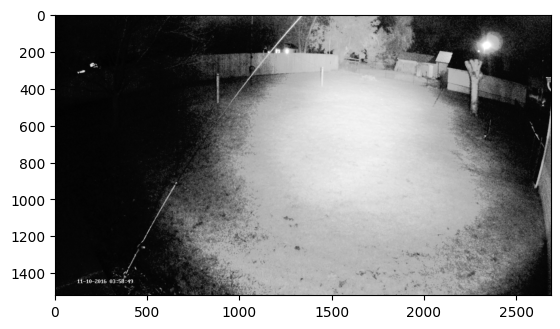

In [ ]:
im1_gray = Gray_scaleTransformation(im, 50, 10, 100, 175)
plt.imshow(im1_gray, cmap="gray")

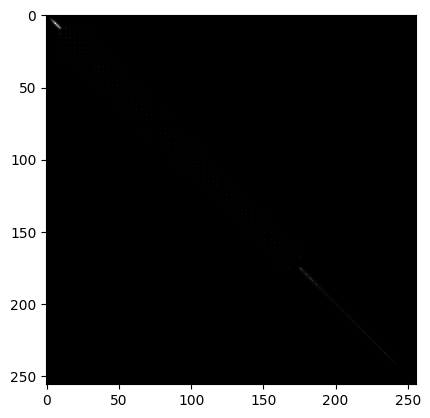

In [ ]:
cr_cont = CalculateCo_occurrence(im1_gray)
plt.imshow(cr_cont, cmap="gray")

In [ ]:
contrast_inc = CalculateContrast(cr_cont)
contrast_inc

2.0080361996452276

**Brighten**

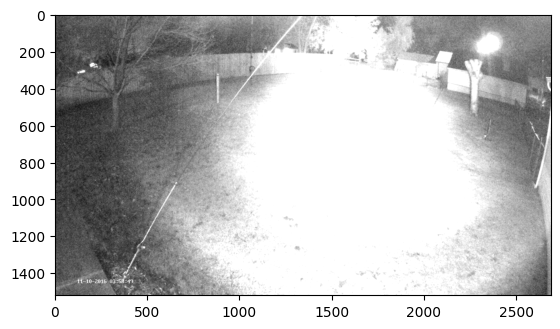

In [ ]:
im1_grayy = Gray_scaleTransformation(im, 0, 50, 100, 255)
plt.imshow(im1_grayy, cmap="gray")

###**2nd Image**

In [ ]:
!wget -O image.png "https://networkcameratech.com/wp-content/uploads/2016/10/HIKVISION-DS-2CD2142FWD-I_2016-Nov-09_21_52_01.png"
im = Image.open("image.png").convert('L')

--2023-10-23 14:33:23--  https://networkcameratech.com/wp-content/uploads/2016/10/HIKVISION-DS-2CD2142FWD-I_2016-Nov-09_21_52_01.png
Resolving networkcameratech.com (networkcameratech.com)... 54.157.250.197
Connecting to networkcameratech.com (networkcameratech.com)|54.157.250.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1822995 (1.7M) [image/png]
Saving to: ‘image.png’

image.png           100%[===================>]   1.74M  3.99MB/s    in 0.4s    

2023-10-23 14:33:23 (3.99 MB/s) - ‘image.png’ saved [1822995/1822995]



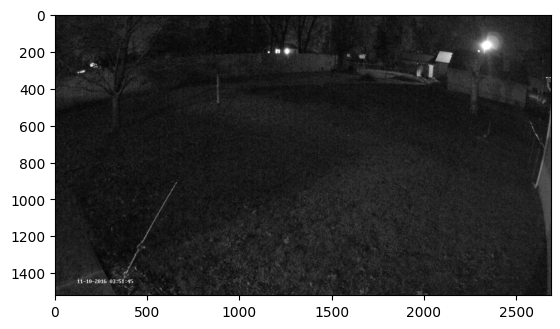

In [ ]:
plt.imshow(im, cmap="gray")

In [ ]:
hist = CalculateHistogram(im)

In [ ]:
c_hist = CalculateCumulativeHistogram(hist)

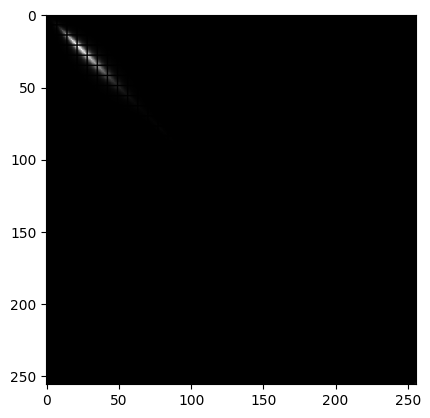

In [ ]:
cr = CalculateCo_occurrence(im)
plt.imshow(cr, cmap="gray")

Initial Contrast

In [ ]:
contrast_in = CalculateContrast(cr)
contrast_in

2.1397670376516364

In [ ]:
min1, max1 = GetColorAtPercentage(c_hist, 5)
min1, max1

(13, 54)

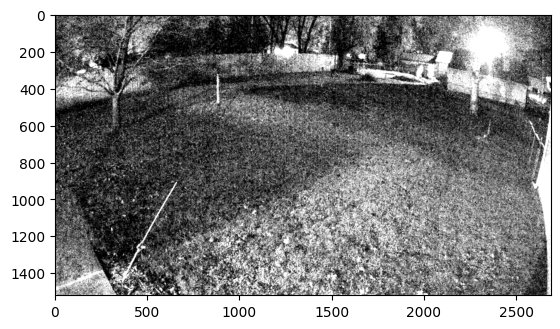

In [ ]:
im1_streched = StretchContrast(im,0, 255, min1, max1)
plt.imshow(im1_streched, cmap="gray")

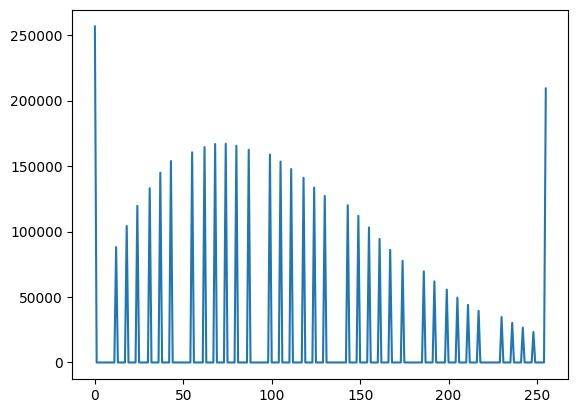

In [ ]:
hist = im1_streched.histogram()
plt.figure()
plt.plot(hist)
plt.show()

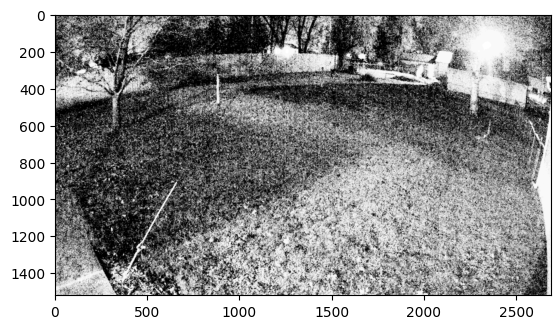

In [ ]:
equalize1 = EqualizeHistogram(im, min1, max1)
plt.imshow(equalize1, cmap="gray")

In [ ]:
min2, max2 = GetColorAtPercentage(c_hist, 10)
min2, max2

(16, 46)

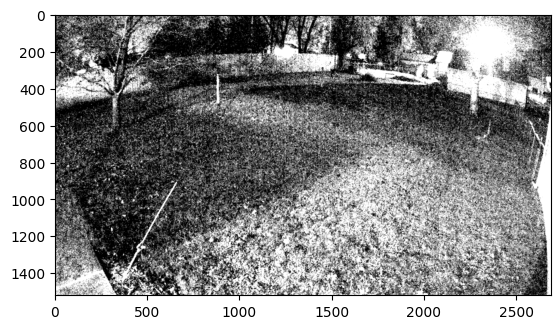

In [ ]:
im1_streched2 = StretchContrast(im,0, 255, min2, max2)
plt.imshow(im1_streched2, cmap="gray")

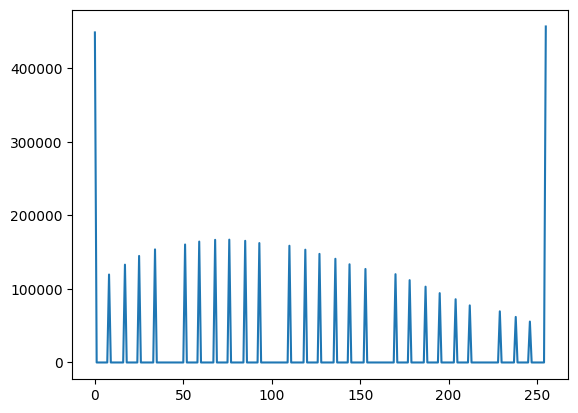

In [ ]:
hist = im1_streched2.histogram()
plt.figure()
plt.plot(hist)
plt.show()

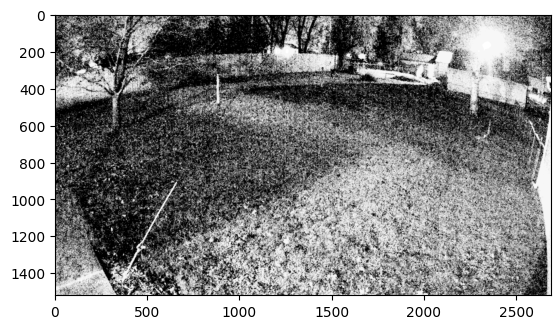

In [ ]:
equalize2 = EqualizeHistogram(im, min2, max2)
plt.imshow(equalize2, cmap="gray")

In [ ]:
min3, max3 = GetColorAtPercentage(c_hist, 15)
min3, max3

(18, 43)

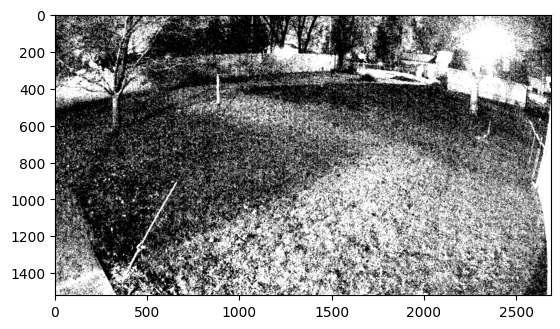

In [ ]:
im1_streched3 = StretchContrast(im,0, 255, min3, max3)
plt.imshow(im1_streched3, cmap="gray")

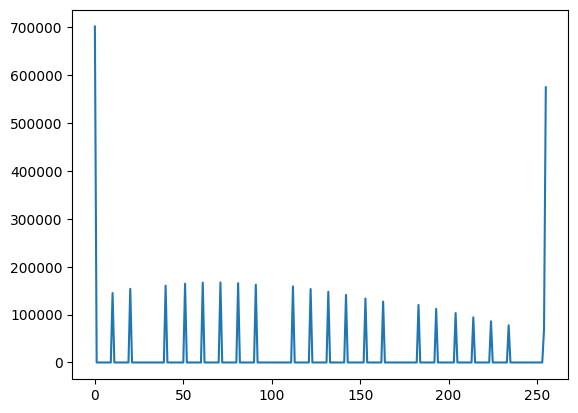

In [ ]:
hist = im1_streched3.histogram()
plt.figure()
plt.plot(hist)
plt.show()

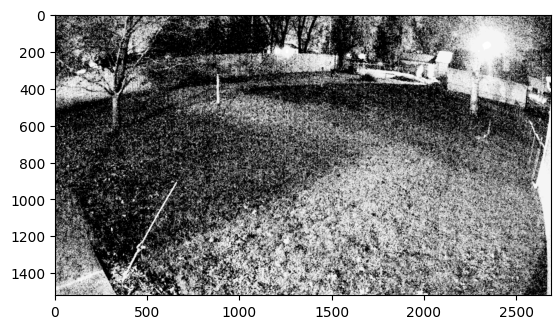

In [ ]:
equalize3 = EqualizeHistogram(im, min3, max3)
plt.imshow(equalize3, cmap="gray")

Increase contrast

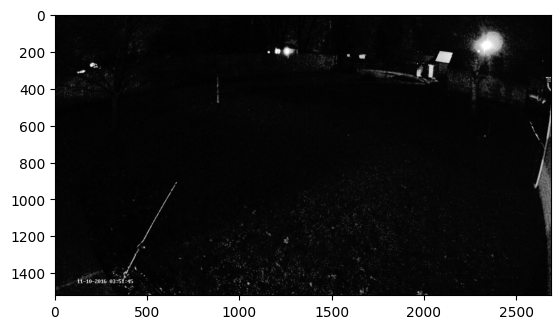

In [ ]:
im1_gray = Gray_scaleTransformation(im, 50, 10, 100, 175)
plt.imshow(im1_gray, cmap="gray")

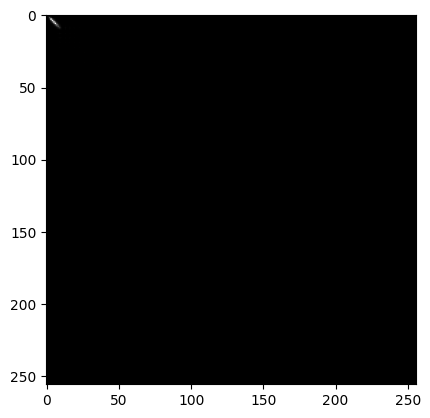

In [ ]:
cr_cont = CalculateCo_occurrence(im1_gray)
plt.imshow(cr_cont, cmap="gray")

In [ ]:
contrast_inc = CalculateContrast(cr_cont)
contrast_inc

1.0758905069810025

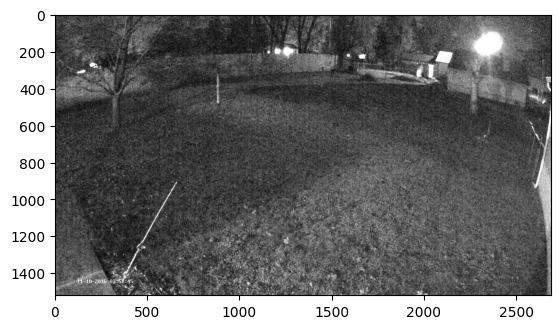

In [ ]:
im1_grayy = Gray_scaleTransformation(im, 0, 50, 100, 255)
plt.imshow(im1_grayy, cmap="gray")

###**3rd Image**

In [ ]:
!wget -O image.png "https://networkcameratech.com/wp-content/uploads/2016/10/AXISP3364_2016-Oct-27_03_50_22.png"
im = Image.open("image.png").convert('L')

--2023-10-23 14:35:58--  https://networkcameratech.com/wp-content/uploads/2016/10/AXISP3364_2016-Oct-27_03_50_22.png
Resolving networkcameratech.com (networkcameratech.com)... 54.157.250.197
Connecting to networkcameratech.com (networkcameratech.com)|54.157.250.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 484966 (474K) [image/png]
Saving to: ‘image.png’

image.png           100%[===================>] 473.60K  1.52MB/s    in 0.3s    

2023-10-23 14:35:58 (1.52 MB/s) - ‘image.png’ saved [484966/484966]



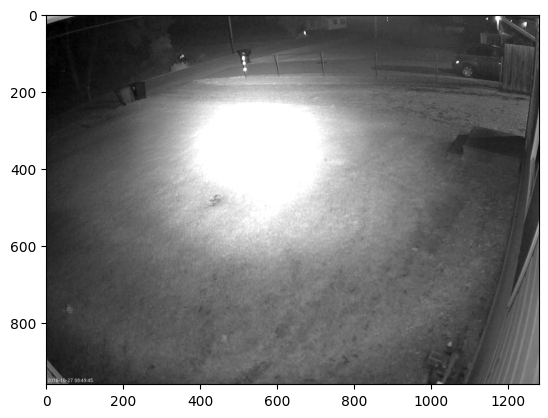

In [ ]:
plt.imshow(im, cmap="gray")

In [ ]:
hist = CalculateHistogram(im)

In [ ]:
c_hist = CalculateCumulativeHistogram(hist)

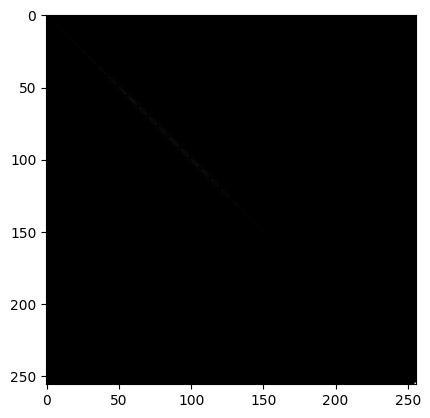

In [ ]:
cr = CalculateCo_occurrence(im)
plt.imshow(cr, cmap="gray")

In [ ]:
contrast_in = CalculateContrast(cr)
contrast_in

0.4734475137331197

In [ ]:
min1, max1 = GetColorAtPercentage(c_hist, 5)
min1, max1

(30, 255)

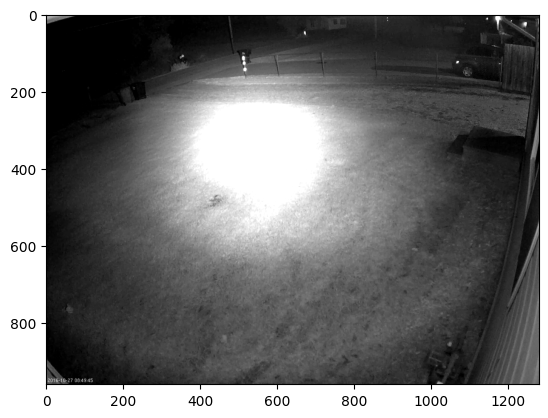

In [ ]:
im1_streched = StretchContrast(im,0, 255, min1, max1)
plt.imshow(im1_streched, cmap="gray")

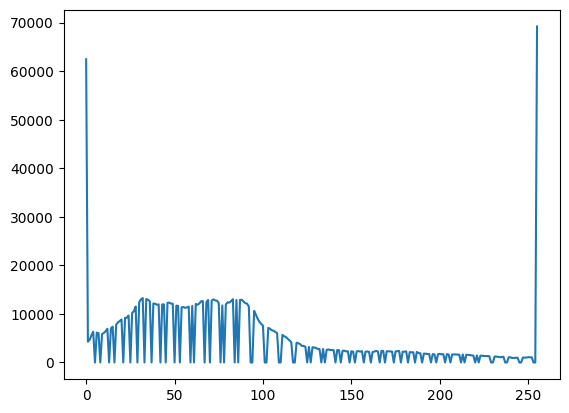

In [ ]:
hist = im1_streched.histogram()
plt.figure()
plt.plot(hist)
plt.show()

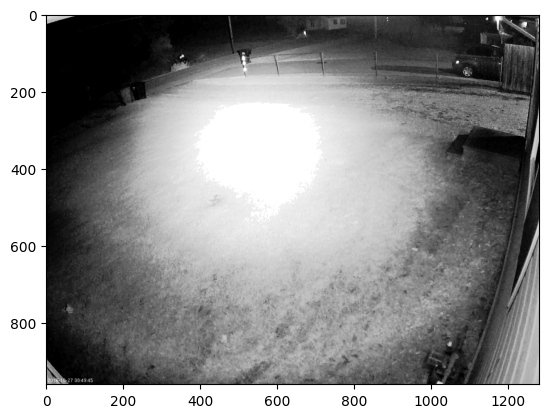

In [ ]:
equalize1 = EqualizeHistogram(im, min1, max1)
plt.imshow(equalize1, cmap="gray")

In [ ]:
min2, max2 = GetColorAtPercentage(c_hist, 10)
min2, max2

(43, 207)

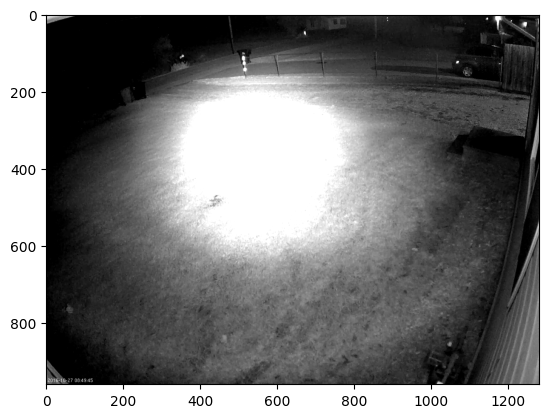

In [ ]:
im1_streched2 = StretchContrast(im,0, 255, min2, max2)
plt.imshow(im1_streched2, cmap="gray")

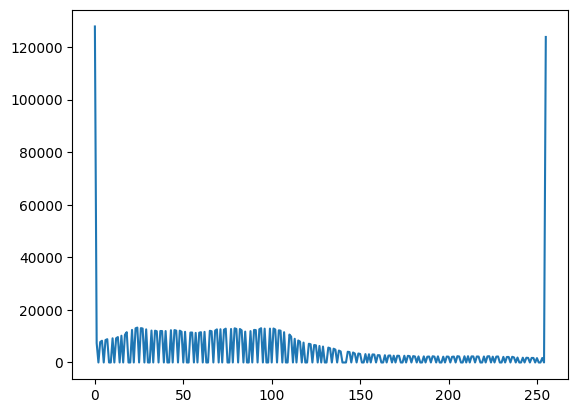

In [ ]:
hist = im1_streched2.histogram()
plt.figure()
plt.plot(hist)
plt.show()

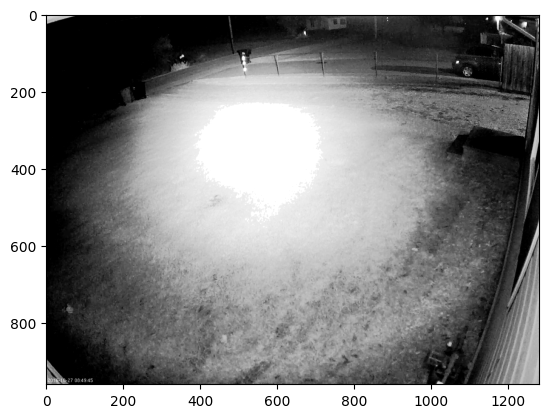

In [ ]:
equalize2 = EqualizeHistogram(im, min2, max2)
plt.imshow(equalize2, cmap="gray")

In [ ]:
min3, max3 = GetColorAtPercentage(c_hist, 15)
min3, max3

(51, 173)

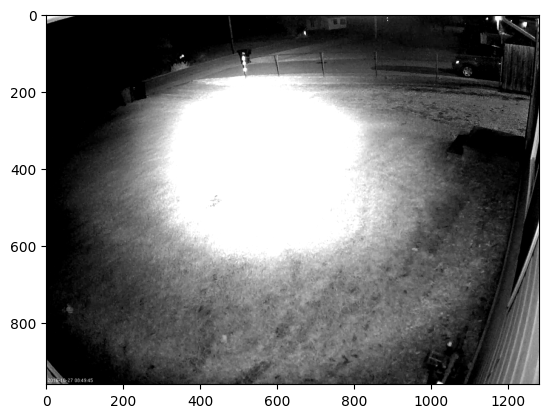

In [ ]:
im1_streched3 = StretchContrast(im,0, 255, min3, max3)
plt.imshow(im1_streched3, cmap="gray")

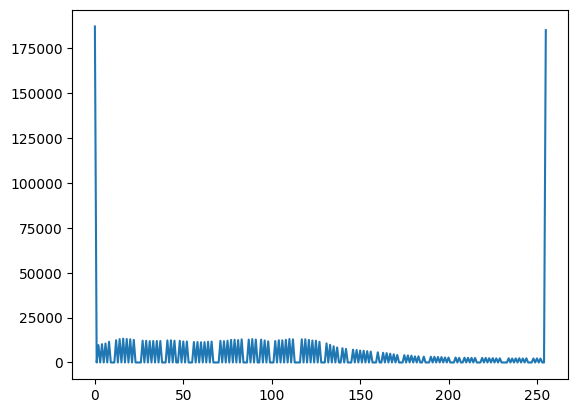

In [ ]:
hist = im1_streched3.histogram()
plt.figure()
plt.plot(hist)
plt.show()

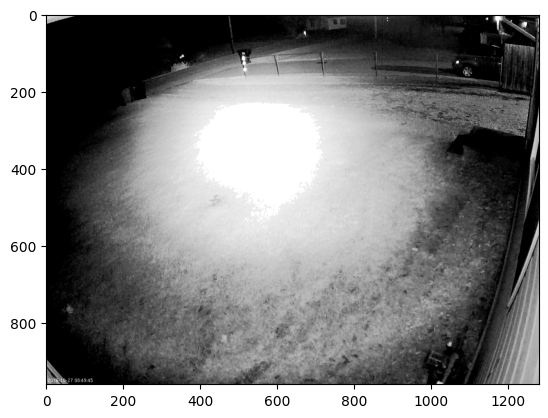

In [ ]:
equalize3 = EqualizeHistogram(im, min3, max3)
plt.imshow(equalize3, cmap="gray")

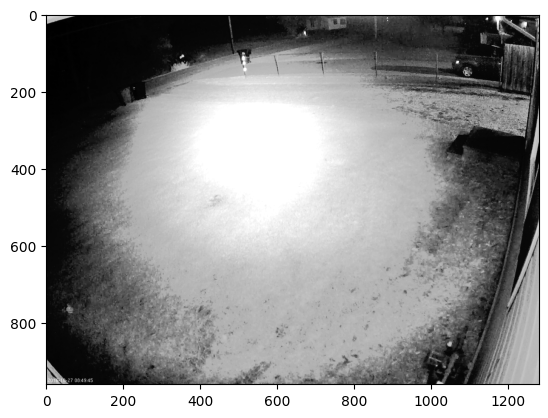

In [ ]:
im1_gray = Gray_scaleTransformation(im, 50, 10, 100, 175)
plt.imshow(im1_gray, cmap="gray")

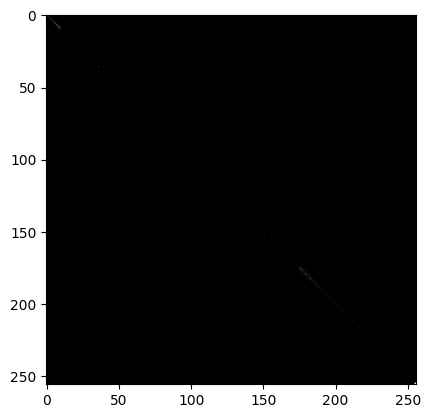

In [ ]:
cr_cont = CalculateCo_occurrence(im1_gray)
plt.imshow(cr_cont, cmap="gray")

In [ ]:
contrast_inc = CalculateContrast(cr_cont)
contrast_inc

0.795384920748455

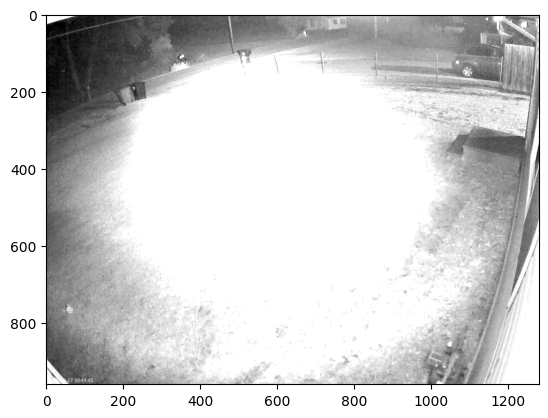

In [ ]:
im1_grayy = Gray_scaleTransformation(im, 0, 50, 100, 255)
plt.imshow(im1_grayy, cmap="gray")